In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def compute_abundance_matching_RodriguezPuebla(z, Mvirz):
    #Rodriguez-Puebla 2017
    #Relationship between initial DM halo and stellar mass 
    #Section 3.2 Parametrization of the SHMR (stellar to mass relation halo) Rodriguez-Puebla 2017
    #Inputs: redshift and virial mass at that redshift in solar masses 
    #Returns the stellar mass in solar masses 
    
    M = Mvirz

    def P(x, y, z):
        return y*z - x*z/(1+z)

    def Q(z):
        return np.exp(-4/(1.+z)**2)

    def g(x, a, g, d):
        return (-np.log10(10**(-a*x)+1.) +
                d*(np.log10(1.+np.exp(x)))**g/(1.+np.exp(10**(-x))))

    al = (1.975, 0.714, 0.042)
    de = (3.390, -0.472, -0.931)
    ga = (0.498, -0.157)
    ep = (-1.758, 0.110, -0.061, -0.023)
    M0 = (11.548, -1.297, -0.026)
    
    alpha = al[0] + P(al[1], al[2], z) * Q(z)
    delta = de[0] + P(de[1], de[2], z) * Q(z)
    gamma = ga[0] + P(ga[1], 0, z) * Q(z)

    eps = 10**(ep[0] + P(ep[1], ep[2], z)*Q(z) + P(ep[3], 0, z))
    M1 = 10**(M0[0] + P(M0[1], M0[2], z)*Q(z))

    x = np.log10(M/M1)
    g1 = g(x, alpha, gamma, delta)
    g0 = g(0, alpha, gamma, delta)

    Ms = 10**(np.log10(eps*M1) + g1 - g0)
    

    return Ms

            
def Mstar(Mvir0, eps_SF):
    
    
    om_b = 0.045
    
    om_m = 0.3
    
    #eps_SF = 0.5
    
    Mh = Mvir0
    
    Ms= eps_SF*(om_b/om_m)*Mh
    
    return Ms  

In [42]:
compute_abundance_matching_RodriguezPuebla(3, 1e12)

8881579961.515226

In [43]:
    
#z = 0
#redshift = np.linspace (z, 10, 100)
Mhalo = np.logspace(10, 15, 100)
Mvir0 = (1e11, 1e12, 1e13, 1e14, 1e15)    
    
Mhab = compute_abundance_matching_RodriguezPuebla(0, Mhalo)


Msall1= Mstar(Mhalo, 10)
Msall2= Mstar(Mhalo, 0.1)
Msall3 = Mstar(Mhalo, .5)
Msall4 = Mstar(Mhalo, .03)


#print(Mhalo)
Msall_list = [Mstar(i, .5) for i in Mvir0]
#print(Msall2)

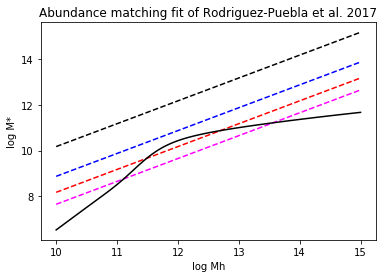

In [46]:
plt.title('Abundance matching fit of Rodriguez-Puebla et al. 2017')
#plt.plot(np.log10(Mhalo), np.log10(Ms), '-k')

plt.plot(np.log10(Mhalo), np.log10(Msall1), '--', color='black')
plt.plot(np.log10(Mhalo), np.log10(Msall2), '--', color='red')
plt.plot(np.log10(Mhalo), np.log10(Msall3), '--', color='blue')
plt.plot(np.log10(Mhalo), np.log10(Msall4), '--', color='magenta')
plt.plot(np.log10(Mhalo), np.log10(Mhab), '-k')
plt.xlabel('log Mh')
plt.ylabel('log M*')

plt.show()
        